# Analyzing Thanksgiving Dinner

In this fun project I break down the behaviour of Americans on Thanksgiving to deep dive into _pandas_! I use this dataset by [DataQuest](https://www.dataquest.io/home) which contains responses to an online survey about what Americans eat for Thanksgiving dinner. Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.
![Img](http://vermontjournal.com/wp-content/uploads/2016/11/thanksgiving-feature_080115.jpg)

* **The dataset is stored in the thanksgiving.csv file**
* **The dataset has 65 columns, and 1058 rows**
* **Most of the column names are questions.**
* **Most of the column values are string responses to the questions.**

In [164]:
# Importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
import re

In [165]:
# Reading data
data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")

## What do people eat for Thanksgiving?

* We want to understand what people ate for Thanksgiving, we'll remove any responses from people who don't celebrate it. The column 'Do you celebrate Thanksgiving?' contains this information. We only want to keep data for people who answered 'Yes' to this questions.
* Let's explore what main dishes people tend to eat during Thanksgiving dinner. We can use the value_counts method to help us with this.
* "Surprise!", **most people ate Turkey**!

In [166]:
# indices of rows for people who celebrate Thanksgiving
yes_celebrating = data['Do you celebrate Thanksgiving?']=='Yes'

# Keep the rows for which [Do you celebrate Thanksgiving?]= Yes
data = data[yes_celebrating] 

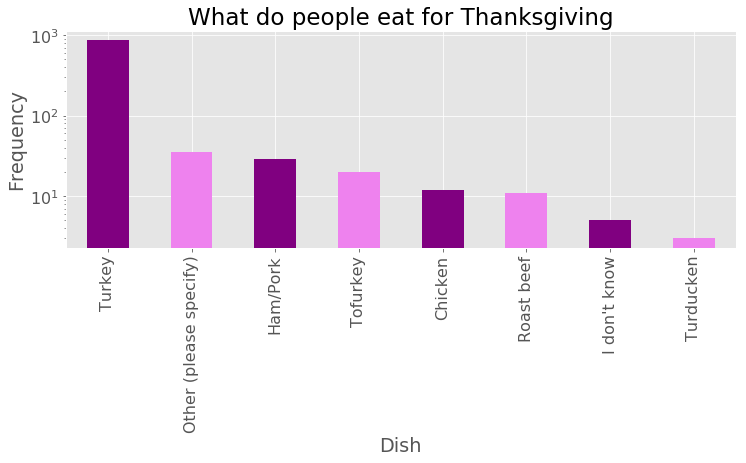

In [182]:
# Count how many times each category occurs 
dish_type = pd.value_counts(data['What is typically the main dish at your Thanksgiving dinner?'].values, sort=True)

#Now make a pie chart
plt.figure(figsize=(12,4))
dish_type.plot(kind='bar', color=['purple', 'violet'])
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlabel('Dish')
plt.title('What do people eat for Thanksgiving')
plt.show()

## What's for dessert?
* Now that we've looked into the main dishes, let's explore the dessert dishes. 
* Specifically, we'll look at how many people eat Apple, Pecan, or Pumpkin pie during Thanksgiving dinner. 
* As expected **Pumpkin Pie is more popular**.
* Another interesting observation is that **most people ate more than one kind of pie** 

In [168]:
#apple
apple_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
apple_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
#pumpkin
pumpkin_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
pumpkin_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
#pecan
pecan_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
pecan_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])


In [169]:
no_pies = apple_isnull & pumpkin_isnull & pecan_isnull
only_apple_pies = apple_notnull & pumpkin_isnull & pecan_isnull
only_pumpkin_pies = apple_isnull & pumpkin_notnull & pecan_isnull
only_pecan_pies = apple_isnull & pumpkin_isnull & pecan_notnull
# create a dictionary with pie counts
pie_types = {}
pie_types['Apple'] = pd.value_counts(only_apple_pies)[1]
pie_types['Pumpkin'] = pd.value_counts(only_pumpkin_pies)[1]
pie_types['Pecan'] = pd.value_counts(only_pecan_pies)[1]
pie_types['None'] = pd.value_counts(no_pies)[1]
pie_types['Multiple'] = pd.value_counts(no_pies)[0] - pie_types['Apple'] - pie_types['Pumpkin'] - pie_types['Pecan'] 

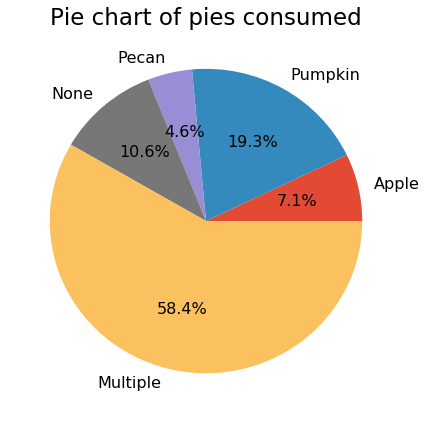

In [170]:
# plot pie data in pie chart 
plt.figure(figsize=(7,7))
plt.pie([int(v) for v in pie_types.values()],labels=pie_types.keys(), autopct='%1.1f%%')
plt.title("Pie chart of pies consumed")
plt.show()

## Age & Income Groups
* Let's analyze the Age column in more depth. In order to analyze the Age column, we'll first need to convert it to numeric values from the categories.
* The 'How much total combined money did all members of your HOUSEHOLD earn last year?' column is very similar to the Age column. 
* It contains categories, but can be converted to numerical values. 
* Finally, we can then plot Histograms to see the distributions.

In [171]:
print(data["Age"].value_counts())
income_col = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
print(data[income_col].value_counts()[:2])

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64
$25,000 to $49,999    166
$50,000 to $74,999    127
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64


In [172]:

def get_int_age(in_str):
    if pd.isnull(in_str):
        return None
    split_str = in_str.split(" ")
    age_str = re.sub('\+$', '', split_str[0])
    try:
        age_int = int(age_str)
    except Exception: 
        age_int = None
    return age_int

def get_int_income(in_str):
    if pd.isnull(in_str):
        return None
    first_str = in_str.split(" ")[0]
    if first_str== 'Prefer':
        return None
    
    income_str = re.sub('[\$\,]', '', first_str)
    try:
        income_int = int(income_str)
    except Exception: 
        income_int = None
    return income_int/1000

In [173]:
# Clean data 
data["int_age"] = data["Age"].apply(get_int_age)
data["int_income"] = data[income_col].apply(get_int_income)
# Fill missing data with median
data["int_age"] = data["int_age"].fillna(data["int_age"].median())
data["int_income"] = data["int_income"].fillna(data["int_income"].median())

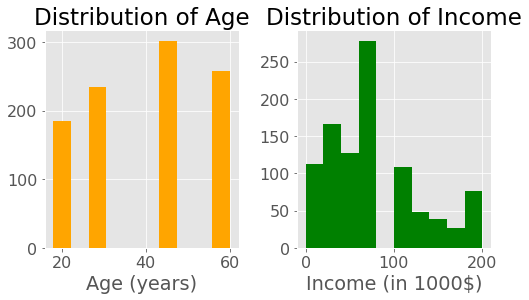

In [183]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

data.hist(column = 'int_age', ax=ax1, color='orange')
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age (years)")
data.hist(column = 'int_income', ax=ax2, color='green')
ax2.set_title("Distribution of Income")
ax2.set_xlabel("Income (in 1000$)")

plt.show()

## Correlating Travel Distance And Income
* We can now see how the distance someone travels for Thanksgiving dinner relates to their income level.

* It's safe to hypothesize that people earning less money could be younger, and would travel to their parent's houses for Thanksgiving. 

* People earning more are more likely to have Thanksgiving at their house as a result.

* We can test this by filtering data based on int_income, and seeing what the values in the How far will you travel for Thanksgiving? 

In [156]:
#  low income results <150K
is_low_income = data['int_income'] < 150
dist_low_income = data['How far will you travel for Thanksgiving?'][is_low_income]
value_dist_low = dist_low_income.value_counts()

In [157]:
# high income results >150K
is_high_income = data['int_income'] > 150
dist_high_income = data['How far will you travel for Thanksgiving?'][is_high_income]
value_dist_high = dist_high_income.value_counts()

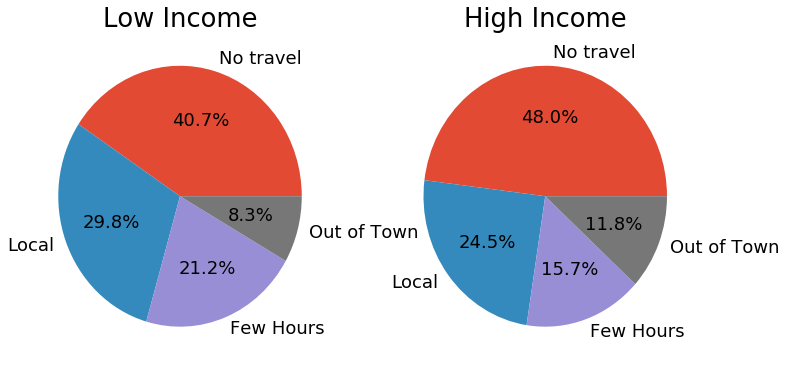

In [158]:
# pie plots
my_label = ["No travel", "Local","Few Hours","Out of Town"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.pie(value_dist_low, labels=my_label, autopct='%1.1f%%')
ax1.set_title("Low Income")

ax2.pie(value_dist_high, labels=my_label, autopct='%1.1f%%')
ax2.set_title("High Income")
fig.subplots_adjust(hspace=6)
plt.show()

## Linking Friendship And Age
There are two columns which directly pertain to friendship, Have you ever tried to meet up with hometown friends on Thanksgiving night?, and Have you ever attended a "Friendsgiving?. In the US, a "Friendsgiving" is when instead of traveling home for the holiday, you celebrate it with friends who live in your area. Both questions seem skewed towards younger people. Let's see if this hypothesis holds up.

In [185]:
icol = "Have you ever tried to meet up with hometown friends on Thanksgiving night?"
ccol = 'Have you ever attended a "Friendsgiving?"'
vcol = 'int_age'
pd.pivot_table(data, values=vcol, index=icol, columns=ccol, aggfunc='mean')


"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.294589,37.010526
Yes,41.494565,34.040462


In [186]:
vcol2 = 'int_income'
pd.pivot_table(data, values=vcol, index=icol, columns=ccol, aggfunc='mean')


"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.294589,37.010526
Yes,41.494565,34.040462
